<img style="float: left; margin: 30px 15px 15px 15px;" src="https://pngimage.net/wp-content/uploads/2018/06/logo-iteso-png-5.png" width="300" height="500" /> 
    
    
### <font color='navy'> Simulación de procesos financieros. 

**Nombres:** Tania Bell Nicholls.

**Fecha:** 08 de octubre del 2021.

**Expediente** : if726767.
**Profesor:** Oscar David Jaramillo Zuluaga.
    
**Link Github**: https://github.com/Tania-Bell/Tarea5_TBell.git

# Tarea 5: Clase 9

## Enunciado de tarea 
    
> Para las siguiente dos funciones, genere muestres aleatorias que distribuyan según la función dada usando el método de la transformada inversa y grafique el histograma de 1000 muestras generadas con el método de la transformada inversa y compárela con el función $f(x)$ **(recuerde que $f(x)$ es la distribución de probabilidad y $F(x)$ es la distribución de probabilidad acumulada)** [ver este enlace para más información](https://es.wikipedia.org/wiki/Funci%C3%B3n_de_distribuci%C3%B3n). Este procedimiento se realiza con el fín de validar que el procedimiento y los resultados son correctos.


> **Nota:** Por notación recuerde que para el caso continuo $f(x)$ es la distribución de probabilidad (PDF), mientras $F(x)$ corresponde a la distribución de probabilidad acumulada (CDF). Para el caso discreto, $P(X=i)$ corresponde a su distribución de probabilidad (PMF) y $ F_{X}(x)=\operatorname {P} (X\leq x)=\sum _{x_{i}\leq x}\operatorname {P} (X=x_{i})=\sum _{x_{i}\leq x}p(x_{i})$, corresponde a su distribución de probabilidad acumulada (CDF).


### Ejercicio 1: 

> 1. Generación variable aleatoria continua
>El tiempo en el cual un movimiento browniano se mantiene sobre su punto máximo en el intervalo [0,1] tiene una distribución
>$$F(x)=\frac{2}{\pi}\sin^{-1}(\sqrt x),\quad 0\leq x\leq 1$$ </font>

Código de solución estudiante 1

El método de la transformada inversa establece
$$X = F^{-1}(U),\quad U \sim \text{Uniforme[0,1]}$$
donde $F^{-1}$ es la transformada inversa de $F$.

$$U = \frac{2}{\pi}\sin^{-1}(\sqrt x),\quad 0\leq x\leq 1$$

$$(\sin^{-1}\sqrt x) = \frac{U}{\frac{2}{\pi}}$$

$$\sqrt x = \sin(\frac{U\pi}{2})$$

$$x = \sin^{2}(\frac{U\pi}{2})$$

Derivada de $$F(x)$$:

$$\frac{dF(x)}{dx} = \frac{d}{dx}\frac{2}{\pi}\sin^{-1}(\sqrt{x})$$

$$\frac{2}{\pi}\frac{1}{\sqrt{1-\sqrt{x}^{2}}}\frac{d}{dx}\sqrt{x}$$

$$\frac{2}{\pi}\frac{1}{\sqrt{1-\sqrt{x}^{2}}}\frac{1}{2}x^{\frac{1}{2}-1}$$

$$\frac{dF(x)}{dx} = \frac{1}{\pi\sqrt{1-x}\sqrt{x}}$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

<ipython-input-2-13f1df233920>:7: RuntimeWarning: divide by zero encountered in true_divide
  funcion = 1/(np.pi*np.sqrt(1-x)*np.sqrt(x))


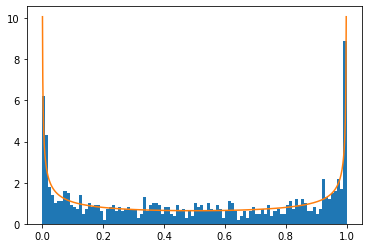

In [2]:
def distribucion():
    x = np.sin((np.random.random()*np.pi)/2)**2
    return x

N = 1000
x = np.arange(0,1,0.001)
funcion = 1/(np.pi*np.sqrt(1-x)*np.sqrt(x))
m = [distribucion() for i in range(N)]
plt.hist(m, bins=100, density = True);
plt.plot(x,funcion);

### Ejercicio 2: 

> 2. Generación variable aleatoria Discreta
> La distribución binomial modela el número de éxitos de n ensayos independientes donde hay una probabilidad p de éxito en cada ensayo.
> Generar una variable aletoria binomial con parámetros $n=10$ y $p=0.7$. Recordar que $$X\sim binomial(n,p) \longrightarrow p_i=P(X=i)=\frac{n!}{i!(n-i)!}p^i(1-p)^{n-i},\quad i=0,1,\cdots,n$$
> Por propiedades de la operación factorial la anterior $p_i$ se puede escribir como:
> $$p_{i+1}=\frac{n-i}{i+1}\frac{p}{1-p} p_i $$


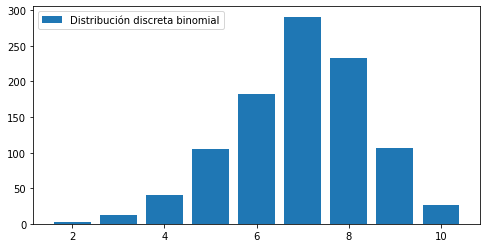

In [3]:
def Gen_distr_discreta(p_acum: 'P.Acumulada de la distribución a generar',
                       indices: 'valores reales a generar aleatoriamente',
                       N: 'cantidad de números aleatorios a generar'):
    
    U =np.random.rand(N)
    # Diccionario de valores aleatorios
    val2id = {i:val_i for i, val_i in enumerate(indices)}

    # Series de los valores aletorios generados
    v = pd.Series([sum([1 for i in p_acum if i<ui]) for ui in U]).map(val2id)

    return v

def plot_histogram_discrete(distribucion:'distribución a graficar histograma',
                            label:'label del legend'):
    # len(set(distribucion)) cuenta la cantidad de elementos distintos de la variable 'distribucion'
    plt.figure(figsize=[8,4])
    y,x = np.histogram(distribucion,bins = len(set(distribucion))) 
    plt.bar(list(set(distribucion)),y,label=label)
    plt.legend()
    plt.show()
    
def P_acum_Binomial_o(n,p):
    Pr = np.zeros(n)
    Pr[0] = (1-p)**n
    def pr(i):
        nonlocal Pr
        c  = p/(1-p)
        Pr[i+1]=(c*(n-i)/(i+1))*Pr[i]
        
    # Lleno el vector Pr usando compresión de listas
    [pr(i) for i in range(n-1)]
    return np.cumsum(Pr)
n = 10
p = 0.7
N = 1000
p_acum = P_acum_Binomial_o(n,p)


plot_histogram_discrete(Gen_distr_discreta(p_acum, np.arange(0, n + 1), N), 'Distribución discreta binomial')